In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [2]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
print businesses.head()
print businesses.info()
print businesses.describe()
# dtype casts the column as a specific data type

   business_id                                name  \
0           10                    Tiramisu Kitchen   
1           19               Nrgize Lifestyle Cafe   
2           24  OMNI S.F. Hotel - 2nd Floor Pantry   
3           31      Norman's Ice Cream and Freezes   
4           45                 CHARLIE'S DELI CAFE   

                         address           city postal_code   latitude  \
0                  033 Belden Pl  San Francisco       94104  37.791116   
1   1200 Van Ness Ave, 3rd Floor  San Francisco       94109  37.786848   
2  500 California St, 2nd  Floor  San Francisco       94104  37.792888   
3           2801 Leavenworth St   San Francisco       94133  37.807155   
4                3202 FOLSOM St            S.F.       94110  37.747114   

    longitude phone_number TaxCode  business_certificate application_date  \
0 -122.403816          NaN     H24              779059.0              NaN   
1 -122.421547          NaN     H24                   NaN              NaN   

/Users/tshepa/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [3]:
type(businesses.phone_number)

pandas.core.series.Series

In [4]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
print inspections.head()
print inspections.info()
print inspections.describe()

   business_id  Score      date                   type
0           10    NaN  20140807  Reinspection/Followup
1           10   94.0  20140729  Routine - Unscheduled
2           10    NaN  20140124  Reinspection/Followup
3           10   92.0  20140114  Routine - Unscheduled
4           19   94.0  20141110  Routine - Unscheduled
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27285 entries, 0 to 27284
Data columns (total 4 columns):
business_id    27285 non-null int64
Score          15263 non-null float64
date           27285 non-null int64
type           27285 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 852.7+ KB
None
        business_id         Score          date
count  27285.000000  15263.000000  2.728500e+04
mean   42194.754444     91.424949  2.014230e+07
std    32661.009655      8.068309  8.907601e+03
min       10.000000     42.000000  2.013041e+07
25%     5025.000000           NaN  2.013121e+07
50%    59065.000000           NaN  2.014071e+07
75%    721

In [5]:
type(inspections.date)

pandas.core.series.Series

In [6]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
print violations.head()
print violations.info()
print violations.describe()

   business_id      date  ViolationTypeID  risk_category  \
0           10  20140114           103154       Low Risk   
1           10  20140114           103119  Moderate Risk   
2           10  20140114           103145       Low Risk   
3           10  20140729           103129  Moderate Risk   
4           10  20140729           103144       Low Risk   

                                         description  
0       Unclean or degraded floors walls or ceilings  
1  Inadequate and inaccessible handwashing facili...  
2   Improper storage of equipment utensils or linens  
3            Insufficient hot water or running water  
4   Unapproved or unmaintained equipment or utensils  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39720 entries, 0 to 39719
Data columns (total 5 columns):
business_id        39720 non-null int64
date               39720 non-null int64
ViolationTypeID    39720 non-null int64
risk_category      39710 non-null object
description        39710 non-null object

In [7]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html



In [8]:
insp_bus_info = pd.merge(inspections, businesses, on='business_id')
insp_bus_info.head()


,business_id,Score,date,type,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,NaN,20140807,Reinspection/Followup,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,10,94.0,20140729,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
2,10,NaN,20140124,Reinspection/Followup,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
3,10,92.0,20140114,Routine - Unscheduled,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
4,19,94.0,20141110,Routine - Unscheduled,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109


In [9]:
vio_bus_info = pd.merge(violations, businesses, on='business_id')
vio_bus_info.head()

,business_id,date,ViolationTypeID,risk_category,description,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104


In [10]:
vio_bus_info.describe()

,business_id,date,ViolationTypeID,latitude,longitude,business_certificate
count,39621.000000,3.962100e+04,39621.000000,30959.000000,30959.000000,3.502500e+04
mean,37358.773807,2.014214e+07,103134.348426,37.655419,-122.042984,4.515759e+05
std,31498.879059,9.067527e+03,16.717252,2.111221,6.842228,2.167371e+05
min,10.000000,2.013041e+07,103101.000000,0.000000,-122.510896,6.710000e+02
25%,3731.000000,2.013120e+07,103120.000000,NaN,NaN,NaN
50%,35464.000000,2.014062e+07,103139.000000,NaN,NaN,NaN
75%,68773.000000,2.015042e+07,103149.000000,NaN,NaN,NaN
max,86845.000000,2.016040e+07,103178.000000,37.875937,0.000000,1.024020e+06


In [11]:
# 2 Which ten business have had the most inspections?
insp_bus_info.business_id.value_counts().head(10)

1775     21
2505     20
74374    20
71618    19
67154    19
71804    19
74131    19
7747     18
489      18
80243    17
Name: business_id, dtype: int64

In [12]:
insp_bus_info.name.value_counts().head(10)

Peet's Coffee & Tea           87
Starbucks Coffee              71
Whole Foods Market            54
STARBUCKS                     49
Specialty's Cafe & Bakery     48
San Francisco Soup Company    44
STARBUCKS COFFEE              44
KENTUCKY FRIED CHICKEN        32
Subway Sandwiches             31
Lee's Deli                    31
Name: name, dtype: int64

In [13]:
# 3 Group and count the inspections by type
inspections.type.value_counts()

Routine - Unscheduled                15481
Reinspection/Followup                 5386
New Ownership                         1877
Complaint                             1634
New Construction                      1613
Non-inspection site visit              840
Complaint Reinspection/Followup        163
Structural Inspection                  120
Foodborne Illness Investigation        100
Routine - Scheduled                     63
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

In [14]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

In [15]:
date2 = pd.to_datetime(inspections['date'], format='%Y%m%d')
date2[0].month

8

In [16]:
vio_bus_info.risk_category.value_counts()

Low Risk         20699
Moderate Risk    13419
High Risk         5493
Name: risk_category, dtype: int64

In [17]:
# 5 Which zip code contains the most high risk violations?
vio_bus_info['owner_zip'].value_counts().head(10)

94133    3262
94110    3118
94109    2919
94122    2045
94102    2041
94112    1642
94103    1575
94107    1489
94108    1419
94121    1314
Name: owner_zip, dtype: int64

In [18]:
vio_bus_info['owner_zip'][vio_bus_info.risk_category == 'High Risk'].value_counts().head(10)

94133    443
94110    387
94109    365
94122    352
94102    268
94103    256
94108    232
94107    196
94112    195
94114    174
Name: owner_zip, dtype: int64

In [19]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [20]:
# 7 Examining the descriptions, what is the most common violation?
violations.description.value_counts().head()

Unclean or degraded floors walls or ceilings                          3395
Moderate risk food holding temperature                                2621
Inadequate and inaccessible handwashing facilities                    2444
Unapproved or unmaintained equipment or utensils                      2335
Wiping cloths not clean or properly stored or inadequate sanitizer    2294
Name: description, dtype: int64

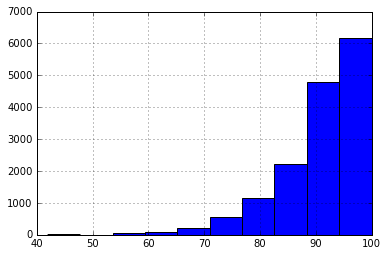

In [21]:
# 8 Create a hist of the scores with 10 bins
inspections.Score.hist(bins=10)

In [22]:
# 9 Can you predict risk category based on the other features in this dataset?

In [23]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [24]:
############################
### A Little More Morbid ###
############################

In [25]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [26]:
killings.describe()

,Unnamed: 0,age,day,year,county_income
count,467.000000,467.000000,467.000000,467.0,467.000000
mean,233.000000,37.351178,15.830835,2015.0,52527.331906
std,134.955548,12.944617,8.658970,0.0,12948.263811
min,0.000000,16.000000,1.000000,2015.0,22545.000000
25%,116.500000,28.000000,8.000000,2015.0,43804.000000
50%,233.000000,35.000000,16.000000,2015.0,50856.000000
75%,349.500000,45.000000,23.000000,2015.0,56832.000000
max,466.000000,87.000000,31.000000,2015.0,110292.000000


In [27]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 15 columns):
Unnamed: 0              467 non-null int64
name                    467 non-null object
age                     467 non-null int64
gender                  467 non-null object
raceethnicity           467 non-null object
month                   467 non-null object
day                     467 non-null int64
year                    467 non-null int64
streetaddress           463 non-null object
city                    467 non-null object
state                   467 non-null object
lawenforcementagency    467 non-null object
cause                   467 non-null object
armed                   467 non-null object
county_income           467 non-null int64
dtypes: int64(5), object(10)
memory usage: 54.8+ KB


In [28]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns={'lawenforcementagency': 'agency', 'raceethnicity': 'race'}, inplace=True)

In [29]:
killings.columns

Index([u'Unnamed: 0', u'name', u'age', u'gender', u'race', u'month', u'day',
       u'year', u'streetaddress', u'city', u'state', u'agency', u'cause',
       u'armed', u'county_income'],
      dtype='object')

In [30]:
# 2. Show the count of missing values in each column


In [31]:
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [32]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings['streetaddress'].fillna("Unknown").head()

0              Clearview Ln
1    300 block Iris Park Dr
2      22nd Ave and 56th St
3         3000 Seminole Ave
4            364 Hiwood Ave
Name: streetaddress, dtype: object

In [33]:
# 4. How many killings were there so far in 2015?
killings.year.value_counts()

2015    467
Name: year, dtype: int64

In [34]:
# 5. Of all killings, how many were male and how many female?
killings['gender'].value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [35]:
# 6. How many killings were of unarmed people?
killings.armed.value_counts()

Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

In [36]:
killings.armed[killings.armed == 'No'].count()

102

In [37]:
# 7. What percentage of all killings were unarmed?
unarmed_killings = killings.armed[killings.armed == 'No'].count()
total_killings = killings.armed.count()
(unarmed_killings*1.0)/total_killings

0.21841541755888652

In [38]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head()

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [39]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

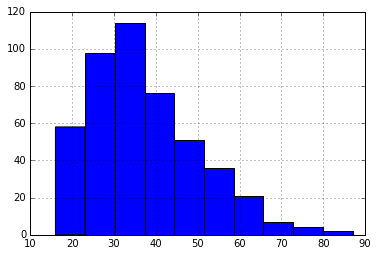

In [40]:
# 10. Display a histogram of ages of all killings
killings.age.hist()

race
Asian/Pacific Islander    Axes(0.125,0.125;0.775x0.775)
Black                     Axes(0.125,0.125;0.775x0.775)
Hispanic/Latino           Axes(0.125,0.125;0.775x0.775)
Native American           Axes(0.125,0.125;0.775x0.775)
Unknown                   Axes(0.125,0.125;0.775x0.775)
White                     Axes(0.125,0.125;0.775x0.775)
Name: age, dtype: object

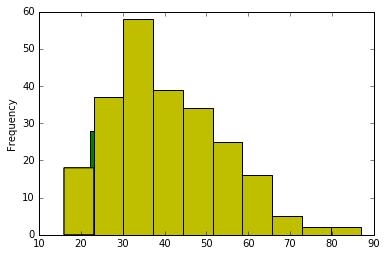

In [41]:
# 11. Show 6 histograms of ages by race
killings.groupby('race').age.plot(kind='hist')

In [42]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

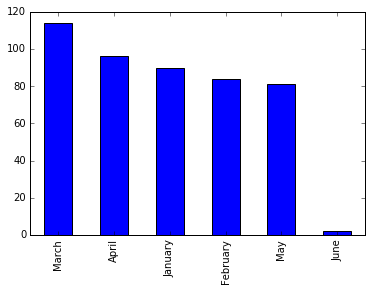

In [43]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot.bar()

In [44]:
###################
### Less Morbid ###
###################

In [45]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [46]:
majors.describe()

,Unnamed: 0,Major_code,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
count,173.000000,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,86.000000,3879.815029,2.302566e+05,1.661620e+05,1.263078e+05,9725.034682,0.057355,56816.184971,38697.109827,82506.358382
std,50.084928,1687.753140,4.220685e+05,3.073244e+05,2.424254e+05,18022.040192,0.019177,14706.226865,9414.524761,20805.330126
min,0.000000,1100.000000,2.396000e+03,1.492000e+03,1.093000e+03,0.000000,0.000000,35000.000000,24900.000000,45800.000000
25%,43.000000,2403.000000,2.428000e+04,1.728100e+04,1.272200e+04,1101.000000,0.046261,46000.000000,32000.000000,70000.000000
50%,86.000000,3608.000000,7.579100e+04,5.656400e+04,3.961300e+04,3619.000000,0.054719,53000.000000,36000.000000,80000.000000
75%,129.000000,5503.000000,2.057630e+05,1.428790e+05,1.110250e+05,8862.000000,0.069043,65000.000000,42000.000000,95000.000000
max,172.000000,6403.000000,3.123510e+06,2.354398e+06,1.939384e+06,147261.000000,0.156147,125000.000000,78000.000000,210000.000000


In [47]:
majors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 12 columns):
Unnamed: 0                       173 non-null int64
Major_code                       173 non-null int64
Major                            173 non-null object
Major_category                   173 non-null object
Total                            173 non-null int64
Employed                         173 non-null int64
Employed_full_time_year_round    173 non-null int64
Unemployed                       173 non-null int64
Unemployment_rate                173 non-null float64
Median                           173 non-null int64
P25th                            173 non-null int64
P75th                            173 non-null float64
dtypes: float64(2), int64(8), object(2)
memory usage: 16.3+ KB


In [49]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
# majors.drop(['Employed_full_time_year_round', 'Major_code'])

In [50]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0                       0
Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

In [51]:
# 3. What are the top 10 highest paying majors?
majors[['Major','Median']].sort_values('Median', ascending=False).head(10)

,Major,Median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


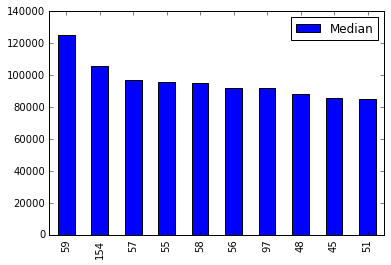

In [52]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors[['Major','Median']].sort_values('Median', ascending=False).head(10).plot.bar()

In [53]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category')['Median'].mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [54]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category')['Median'].mean().sort_values(ascending = False).head(5)

Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64

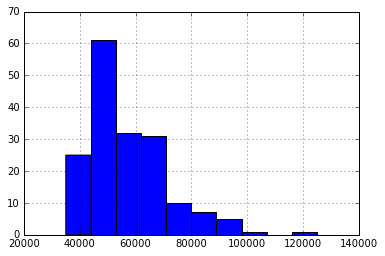

In [55]:
# 7. Plot a histogram of the distribution of median salaries
majors.Median.hist()

Major_category
Agriculture & Natural Resources        Axes(0.125,0.125;0.775x0.775)
Arts                                   Axes(0.125,0.125;0.775x0.775)
Biology & Life Science                 Axes(0.125,0.125;0.775x0.775)
Business                               Axes(0.125,0.125;0.775x0.775)
Communications & Journalism            Axes(0.125,0.125;0.775x0.775)
Computers & Mathematics                Axes(0.125,0.125;0.775x0.775)
Education                              Axes(0.125,0.125;0.775x0.775)
Engineering                            Axes(0.125,0.125;0.775x0.775)
Health                                 Axes(0.125,0.125;0.775x0.775)
Humanities & Liberal Arts              Axes(0.125,0.125;0.775x0.775)
Industrial Arts & Consumer Services    Axes(0.125,0.125;0.775x0.775)
Interdisciplinary                      Axes(0.125,0.125;0.775x0.775)
Law & Public Policy                    Axes(0.125,0.125;0.775x0.775)
Physical Sciences                      Axes(0.125,0.125;0.775x0.775)
Psychology & Social

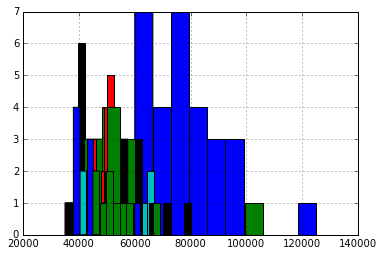

In [56]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.groupby('Major_category')['Median'].hist()

In [57]:
# 9. What are the top 10 most UNemployed majors?
majors[['Major','Unemployed']].sort_values('Unemployed', ascending=False).head(10)

,Major,Unemployed
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261
158,GENERAL BUSINESS,85626
114,PSYCHOLOGY,79066
159,ACCOUNTING,75379
13,COMMUNICATIONS,54390
73,ENGLISH LANGUAGE AND LITERATURE,52248
164,MARKETING AND MARKETING RESEARCH,51839
132,POLITICAL SCIENCE AND GOVERNMENT,40376
25,GENERAL EDUCATION,38742
78,BIOLOGY,36757


In [58]:
# What are the unemployment rates?
majors[['Major','Unemployment_rate']].sort_values('Unemployment_rate', ascending=False).head(10)

,Major,Unemployment_rate
146,MISCELLANEOUS FINE ARTS,0.156147
116,CLINICAL PSYCHOLOGY,0.102712
93,MILITARY TECHNOLOGIES,0.101796
27,SCHOOL STUDENT COUNSELING,0.101746
77,LIBRARY SCIENCE,0.094843
141,VISUAL AND PERFORMING ARTS,0.094658
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
119,SOCIAL PSYCHOLOGY,0.087336
104,ASTRONOMY AND ASTROPHYSICS,0.086022
11,ARCHITECTURE,0.085991


In [59]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors.groupby('Major_category')['Unemployed'].mean().sort_values(ascending=False).head(10)

Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64

In [60]:
majors.groupby('Major_category')['Unemployment_rate'].mean().sort_values(ascending=False).head(10)

Major_category
Arts                                   0.087601
Psychology & Social Work               0.077867
Interdisciplinary                      0.077269
Humanities & Liberal Arts              0.069429
Communications & Journalism            0.069125
Law & Public Policy                    0.067854
Social Science                         0.065686
Computers & Mathematics                0.059437
Industrial Arts & Consumer Services    0.058546
Physical Sciences                      0.054541
Name: Unemployment_rate, dtype: float64

In [61]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] = majors.Employed / majors.Total
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0,0.704225
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0,0.806338
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0,0.775173
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0,0.783948
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0,0.711738


In [62]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate'] = 1 - majors['sample_employment_rate']
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0,0.711738,0.288262
